cd /scratch/groups/mrivas/szainana/

In [1]:
!pip uninstall umr-visualizer -y


Found existing installation: umr-visualizer 0.1.2
Uninstalling umr-visualizer-0.1.2:
  Successfully uninstalled umr-visualizer-0.1.2


In [2]:
! pip list | grep umr-visualizer

In [3]:
! pip install -e /Users/salmazainana/umr-visualizer
! pip install --upgrade nbformat



Obtaining file:///Users/salmazainana/umr-visualizer
  Preparing metadata (setup.py) ... done
  DEPRECATION: Legacy editable install of umr-visualizer==0.1.2 from file:///Users/salmazainana/umr-visualizer (setup.py develop) is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for umr-visualizer


In [4]:
# Check if package installed
! pip list | grep umr-visualizer

umr-visualizer            0.1.2       /Users/salmazainana/umr-visualizer


In [5]:
# # Even if the package is installed, sometimes Jupyter doesn’t recognize it. To fix this:
import sys
print(sys.executable)
sys.path.append("/Users/salmazainana/umr-visualizer")


/opt/anaconda3/envs/umr-visualizer/bin/python


In [6]:
import umr_visualizer as uv
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


# The dataset on the KCNK6 pheno 30680 gene (LDL description)

### Load data set 

In [67]:
file_path = "/Users/salmazainana/Documents/Rivas/Dataset/filtered_KCNK6_data.tsv"
correct_columns = [
    "locus", "alleles", "markerID", "gene", "annotation", "call_stats", "n_cases",
    "n_controls", "heritability", "saige_version", "inv_normalized", "trait_type",
    "phenocode", "pheno_sex", "coding", "modifier", "n_cases_defined", 
    "n_cases_both_sexes", "n_cases_females", "n_cases_males", "description", 
    "description_more", "coding_description", "category", "AC", "AF", "BETA", 
    "SE", "AF.Cases", "AF.Controls", "Pvalue", "chr", "pos", "ref", "alt", 
    "prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"
]

df = pd.read_csv(file_path, sep="\t", skiprows=1, names=correct_columns)
df.head()




/var/folders/th/syv18z517n5cjstlw_sv7hz00000gn/T/ipykernel_55924/1615998994.py:12: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



,locus,alleles,markerID,gene,annotation,call_stats,n_cases,n_controls,heritability,saige_version,...,AF.Controls,Pvalue,chr,pos,ref,alt,prob_0,am_pathogenicity,pLoF_indicator,missense_indicator
0,chr19:38319956,"[""G"",""A""]",chr19:38319956_G/A,KCNK6,synonymous,"{""AC"":51,""AF"":6.458295870996173E-5,""AN"":789682...",56050,NaN,0.0,SAIGE_0.44.5,...,NaN,0.323320,chr19,38319956,G,A,NaN,NaN,0,0
1,chr19:38319980,"[""C"",""T""]",chr19:38319980_C/T,KCNK6,synonymous,"{""AC"":3,""AF"":3.7989975711742196E-6,""AN"":789682...",56050,NaN,0.0,SAIGE_0.44.5,...,NaN,0.081197,chr19,38319980,C,T,NaN,NaN,0,0
2,chr19:38319991,"[""A"",""T""]",chr19:38319991_A/T,KCNK6,missense,"{""AC"":42,""AF"":5.318717834420716E-5,""AN"":789664...",56050,NaN,0.0,SAIGE_0.44.5,...,NaN,0.755360,chr19,38319991,A,T,NaN,0.1247,0,1
3,chr19:38320009,"[""T"",""TGGGCGCGCTGTTGG""]",chr19:38320009_T/TGGGCGCGCTGTTGG,KCNK6,pLoF,"{""AC"":260,""AF"":3.2924645616843234E-4,""AN"":7896...",56050,NaN,0.0,SAIGE_0.44.5,...,NaN,0.536840,chr19,38320009,T,TGGGCGCGCTGTTGG,NaN,NaN,1,0
4,chr19:38320030,"[""G"",""T""]",chr19:38320030_G/T,KCNK6,missense,"{""AC"":3,""AF"":3.7990168144484207E-6,""AN"":789678...",56050,NaN,0.0,SAIGE_0.44.5,...,NaN,0.690820,chr19,38320030,G,T,NaN,0.1103,0,1


In [68]:
# Dataset size
df.shape

(101540, 39)

In [69]:
len(df[df["phenocode"] == 30680])


291

In [70]:
# Keep rows with phenocode = 30680

df = df[df["phenocode"] == 30680]

columns_to_keep = ["gene", "BETA", "SE", "prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]

# Keep only these columns
df_filtered = df[columns_to_keep]
df_filtered.head()

# Save the filtered DataFrame
output_file_path = "/Users/salmazainana/Documents/Rivas/Dataset/cleaned_KCNK6_data.tsv"
df_filtered.to_csv(output_file_path, sep="\t", index=False)
df = pd.read_csv(output_file_path, sep="\t")
df.head()




,gene,BETA,SE,prob_0,am_pathogenicity,pLoF_indicator,missense_indicator
0,KCNK6,-0.619030,0.68271,NaN,NaN,0,1
1,KCNK6,0.091654,0.55743,NaN,0.1126,0,1
2,KCNK6,-0.115640,0.14084,NaN,NaN,0,0
3,KCNK6,-0.743000,0.96548,NaN,0.1517,0,1
4,KCNK6,-0.001520,0.43178,NaN,0.1177,0,1


In [71]:
#print number of examples
print(f"Number of examples: {df.shape[0]}")

Number of examples: 291


In [72]:
print(df.nunique())

gene                    1
BETA                  288
SE                     91
prob_0                228
am_pathogenicity      168
pLoF_indicator          2
missense_indicator      2
dtype: int64


In [73]:

# Check if there are NaNs in any columns 
df.isnull().sum()



gene                    0
BETA                    0
SE                      0
prob_0                 23
am_pathogenicity      114
pLoF_indicator          0
missense_indicator      0
dtype: int64

In [74]:
# # fill the Nan Values with average of the column for prob_0 and am+pathogenicity
# df["prob_0"] = df["prob_0"].fillna(df["prob_0"].mean())
# df["am_pathogenicity"] = df["am_pathogenicity"].fillna(df["am_pathogenicity"].mean())
# df.isnull().sum()

# Drop rows with NaN values
# df = df.dropna()
# df.isnull().sum()


# We can't drop them because we will lose a the variety in the two last columns 
# instead we can fill them with the mean of the column
df["prob_0"] = df["prob_0"].fillna(df["prob_0"].mean())
df["am_pathogenicity"] = df["am_pathogenicity"].fillna(df["am_pathogenicity"].mean())



In [75]:
df.isnull().sum()

gene                  0
BETA                  0
SE                    0
prob_0                0
am_pathogenicity      0
pLoF_indicator        0
missense_indicator    0
dtype: int64

In [76]:
print(f"Number of examples: {df.shape[0]}")

Number of examples: 291


In [77]:
print(df.nunique()) # to make sure no constant columns

gene                    1
BETA                  288
SE                     91
prob_0                229
am_pathogenicity      169
pLoF_indicator          2
missense_indicator      2
dtype: int64


### Preprocessing 

In [78]:
df.head()

,gene,BETA,SE,prob_0,am_pathogenicity,pLoF_indicator,missense_indicator
0,KCNK6,-0.619030,0.68271,0.005094,0.259205,0,1
1,KCNK6,0.091654,0.55743,0.005094,0.112600,0,1
2,KCNK6,-0.115640,0.14084,0.005094,0.259205,0,0
3,KCNK6,-0.743000,0.96548,0.005094,0.151700,0,1
4,KCNK6,-0.001520,0.43178,0.005094,0.117700,0,1


In [79]:
print("SE min:", np.min(df["SE"]))
print("SE max:", np.max(df["SE"]))

SE min: 0.0030202
SE max: 0.96562


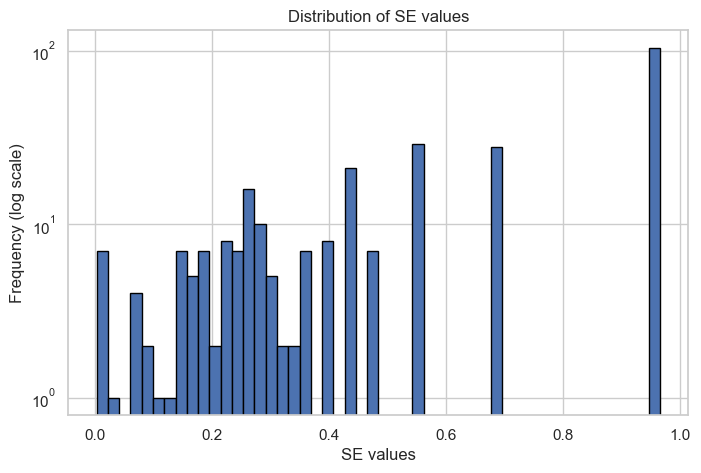

In [80]:
# Assuming SE values are stored in a variable called se_values
se_values = df["SE"].values

# Plot histogram of SE values
plt.figure(figsize=(8, 5))
plt.hist(se_values, bins=50, edgecolor="black", log=True)  # Log scale for better visibility
plt.xlabel("SE values")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of SE values")
plt.show()

In [81]:
# Compute IQR
Q1 = np.percentile(se_values, 25)
Q3 = np.percentile(se_values, 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where SE is outside the bounds
valid_indices = (se_values >= lower_bound) & (se_values <= upper_bound)
df_filtered = df[valid_indices]


In [82]:
print("SE min:", np.min(df_filtered["SE"]))
print("SE max:", np.max(df_filtered["SE"]))

SE min: 0.0030202
SE max: 0.96562


In [83]:
print(f"Number of examples: {df_filtered.shape[0]}")

Number of examples: 291


In [84]:
# # Clip very small SE values to avoid extreme w values
# SE_min_threshold = 1e-2 # Adjust as needed
# df_filtered = df_filtered[df_filtered["SE"] >= SE_min_threshold]
# print("SE min:", np.min(df_filtered["SE"]))
# print("SE max:", np.max(df_filtered["SE"]))
# print(f"Number of examples: {df_filtered.shape[0]}")

## Getting Fitted values

In [85]:
X_full = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]].values
y = df_filtered['BETA'].values
w = 1 / (df_filtered['SE'].values ** 2)


In [86]:
# Does X_full contain any NaN values?
print("X_full contains NaN:", np.isnan(X_full).any())

X_full contains NaN: False


In [87]:
print("w contains NaN:", np.isnan(w).any())
print("w contains Inf:", np.isinf(w).any())
print("w min:", np.min(w))
print("w max:", np.max(w))
print("the shape of w is:", w.shape)

w contains NaN: False
w contains Inf: False
w min: 1.0724757853532223
w max: 109629.79286270672
the shape of w is: (291,)


In [88]:
# Print the shape of matrix X_full
print("Shape of X_full:", X_full.shape)

Shape of X_full: (291, 4)


In [89]:
X_w = X_full.T * w
tmp = X_w @ X_full# Equivalent to X_full.T @ np.diag(w) @ X_full

In [90]:

print("Determinant:", np.linalg.det(tmp))
print("Rank:", np.linalg.matrix_rank(tmp), "/", tmp.shape[0])

Determinant: 8551311048071.711
Rank: 4 / 4


In [91]:
matrix_to_invert = np.linalg.pinv(tmp) 


In [92]:
beta_full = matrix_to_invert @ (X_w @ y)


In [93]:

fitted_values_full = np.dot(X_full, beta_full)


In [94]:
corr_matrix = pd.DataFrame(X_full).corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
          0             1             2             3
0  1.000000  5.026081e-02  1.879281e-02 -5.757537e-02
1  0.050261  1.000000e+00 -9.376585e-18 -1.925302e-17
2  0.018793 -9.376585e-18  1.000000e+00 -3.484763e-01
3 -0.057575 -1.925302e-17 -3.484763e-01  1.000000e+00


In [95]:
print(pd.DataFrame(X_full).nunique())

0    229
1    169
2      2
3      2
dtype: int64


# Testing functions

In [96]:
import statsmodels.api as sm
X = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]].values
y = df_filtered['BETA'].values
w = 1 / (df_filtered['SE'].values ** 2)

### Testing SSR:

SSR = sum wi(beta_i - predicted_beta_i)

In [97]:
uv.ssr_mod_all(df_filtered, fitted_values_full)

np.float64(449.5294078798596)

In [98]:
# Fit WLS model
model = sm.WLS(y, X, weights=w).fit()

fitted_vals = model.fittedvalues  # This is X * Bhat
residuals = model.resid          # y_i - fitted_vals

# Weighted residual sum of squares, i.e. SSR_full
ssr_full_sm = np.sum(w * residuals**2)
r2_total = model.rsquared
print("SSR_full (from statsmodels):", ssr_full_sm)

SSR_full (from statsmodels): 449.5294078798596


### Testing SST:

SST = sum wi(beta_i - beta_i_bar)  with beta_i_bar = sum wiyi / sum wi


In [99]:
uv.sst_all(df_filtered)

np.float64(471.72055515586567)

In [100]:
# Weighted mean of y
y_w = np.sum(w * y) / np.sum(w)

# Weighted total sum of squares, i.e. SST
sst_sm = np.sum(w * (y - y_w)**2)
print("SST (from statsmodels):", sst_sm)

SST (from statsmodels): 471.72055515586567


### Testing R2 total

In [101]:
r = 1 - uv.ssr_mod_all(df_filtered, fitted_values_full)/uv.sst_all(df_filtered)
print(r)

0.0470429940638768


In [102]:
r2 = 1 - ssr_full_sm / sst_sm
print("R^2 (from statsmodels):", r2)

R^2 (from statsmodels): 0.0470429940638768


In [103]:
print("R2_total (from statsmodels):", r2_total)

R2_total (from statsmodels): 0.16604034630072118




### Testing SSR_reduced_j:


In [104]:
for mod in ["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]:
    print("\n")
    print(" For reduced model: ", mod)
    print(" SSR reduced is :",     uv.ssr_mod_reduced(df_filtered, fitted_values_full, mod))



 For reduced model:  prob_0
 SSR reduced is : 461.5607530143726


 For reduced model:  am_pathogenicity
 SSR reduced is : 458.9088964625057


 For reduced model:  pLoF_indicator
 SSR reduced is : 451.50773353325883


 For reduced model:  missense_indicator
 SSR reduced is : 499.56621889470944


In [105]:
for mod in ["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]:
    print("\n")
    print(" For reduced model: ", mod)
    X_temp = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]].drop(mod, axis=1)
    y = df_filtered['BETA']
    w = 1 / (df_filtered['SE'].values ** 2)
    reduced_model = sm.WLS(y, X_temp, weights=w).fit()
    fitted_vals = reduced_model.fittedvalues  
    residuals = reduced_model.resid          
    ssr_red_sm = np.sum(w * residuals**2)
    print("SSR_full (from statsmodels):", ssr_red_sm)





 For reduced model:  prob_0
SSR_full (from statsmodels): 461.5607530143726


 For reduced model:  am_pathogenicity
SSR_full (from statsmodels): 458.90889646250577


 For reduced model:  pLoF_indicator
SSR_full (from statsmodels): 451.50773353325883


 For reduced model:  missense_indicator
SSR_full (from statsmodels): 499.5662188947095




### Testing R^2_j:

R^2_j = (SSR_red_j - SSR_full )/SSR_red_j


In [106]:
for mod in ["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]:
    print("\n")
    print(" For reduced model: ", mod)
    result = uv.proportion_variance_explained_per_gene(df_filtered, fitted_values_full, mod)
    print(result)



 For reduced model:  prob_0
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.554103           0.026067


 For reduced model:  am_pathogenicity
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.434468           0.020439


 For reduced model:  pLoF_indicator
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                        0.09314           0.004382


 For reduced model:  missense_indicator
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       2.129127           0.100161


In [107]:
# R^2 of reduced mod is 1 - (ssr_reduced / sst)	 and means Variance explained without mod1
# Partial R² for mod1	(ssr_reduced - ssr_full) / ssr_reduced	How much mod1 improves model fit


for mod in ["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]:
    print("\n")
    print(" For reduced model: ", mod)
    X_temp = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]].drop(mod, axis=1)
    y = df_filtered['BETA']
    w = 1 / (df_filtered['SE'].values ** 2)
    reduced_model = sm.WLS(y, X_temp, weights=w).fit()
    ssr_reduced = np.sum(w * reduced_model.resid ** 2)

    # Partial R² for mod1
    r2_red_mod = 1 - ssr_reduced / sst_sm
    partial_r2_mod1 = (ssr_reduced - ssr_full_sm) / ssr_reduced
    prop = partial_r2_mod1/r2
    print(f"R² for reduced model {mod}: {r2_red_mod:.4f}")
    print(f"Partial R² for {mod}: {partial_r2_mod1:.4f}")
    print(f"Proportion of variance explained by {mod}: {prop:.4f}")



 For reduced model:  prob_0
R² for reduced model prob_0: 0.0215
Partial R² for prob_0: 0.0261
Proportion of variance explained by prob_0: 0.5541


 For reduced model:  am_pathogenicity
R² for reduced model am_pathogenicity: 0.0272
Partial R² for am_pathogenicity: 0.0204
Proportion of variance explained by am_pathogenicity: 0.4345


 For reduced model:  pLoF_indicator
R² for reduced model pLoF_indicator: 0.0428
Partial R² for pLoF_indicator: 0.0044
Proportion of variance explained by pLoF_indicator: 0.0931


 For reduced model:  missense_indicator
R² for reduced model missense_indicator: -0.0590
Partial R² for missense_indicator: 0.1002
Proportion of variance explained by missense_indicator: 2.1291


## Plotting of filtered data

In [108]:
%matplotlib inline


Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['KCNK6']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Generating plot for gene: KCNK6
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.554103           0.026067
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.434468           0.020439
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                        0.09314           0.004382
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       2.129127           0.100161
Variance data for gene KCNK6: {'prob_0': np.float64(0.5541028160374821), 'am_pathogenicity': np.float64(0.43446793251763577), 'pLoF_indica

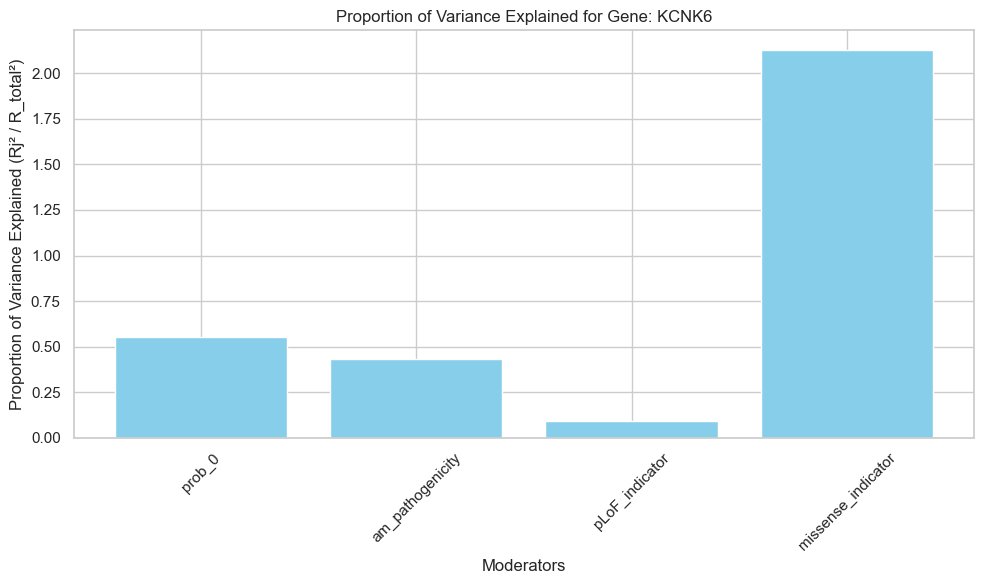

In [109]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="matplotlib", gene_filter=["KCNK6"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['KCNK6']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Generating plot for gene: KCNK6
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.554103           0.026067
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.434468           0.020439
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                        0.09314           0.004382
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       2.129127           0.100161
Variance data for gene KCNK6: {'prob_0': np.float64(0.5541028160374821), 'am_pathogenicity': np.float64(0.43446793251763577), 'pLoF_indica

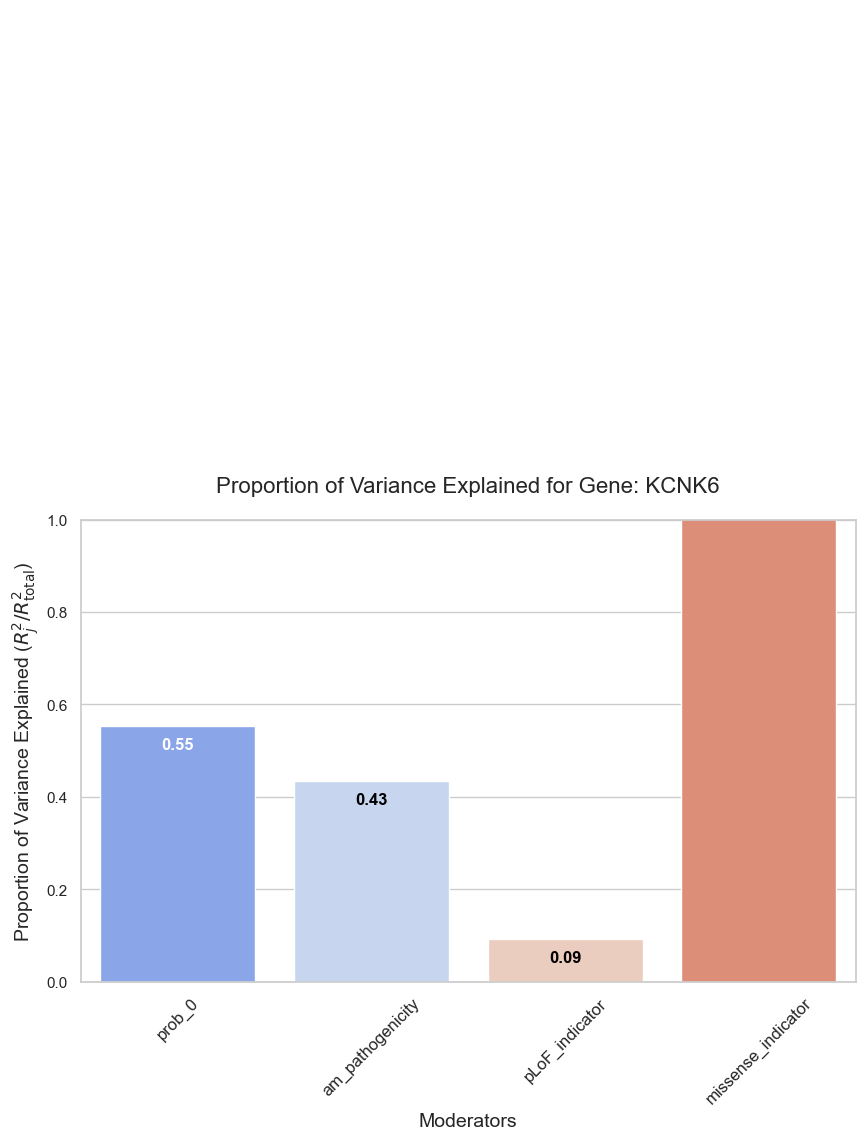

In [110]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="seaborn", gene_filter=["KCNK6"])

In [111]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="plotly", gene_filter=["KCNK6"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['KCNK6']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Generating plot for gene: KCNK6
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.554103           0.026067
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.434468           0.020439
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                        0.09314           0.004382
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       2.129127           0.100161
Variance data for gene KCNK6: {'prob_0': np.float64(0.5541028160374821), 'am_pathogenicity': np.float64(0.43446793251763577), 'pLoF_indica

In [112]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="plotly", gene_filter=["KCNK6"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['KCNK6']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Generating plot for gene: KCNK6
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.554103           0.026067
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       0.434468           0.020439
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                        0.09314           0.004382
    gene  Proportion_Variance_Explained  R_squared_reduced
0  KCNK6                       2.129127           0.100161
Variance data for gene KCNK6: {'prob_0': np.float64(0.5541028160374821), 'am_pathogenicity': np.float64(0.43446793251763577), 'pLoF_indica

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['KCNK6']
Processing full model R² for gene: KCNK6
For gene KCNK6 : SSR Full= 449.5294078798596, SST= 471.72055515586567
Computed Full Model R² values: {'KCNK6': np.float64(0.0470429940638768)}


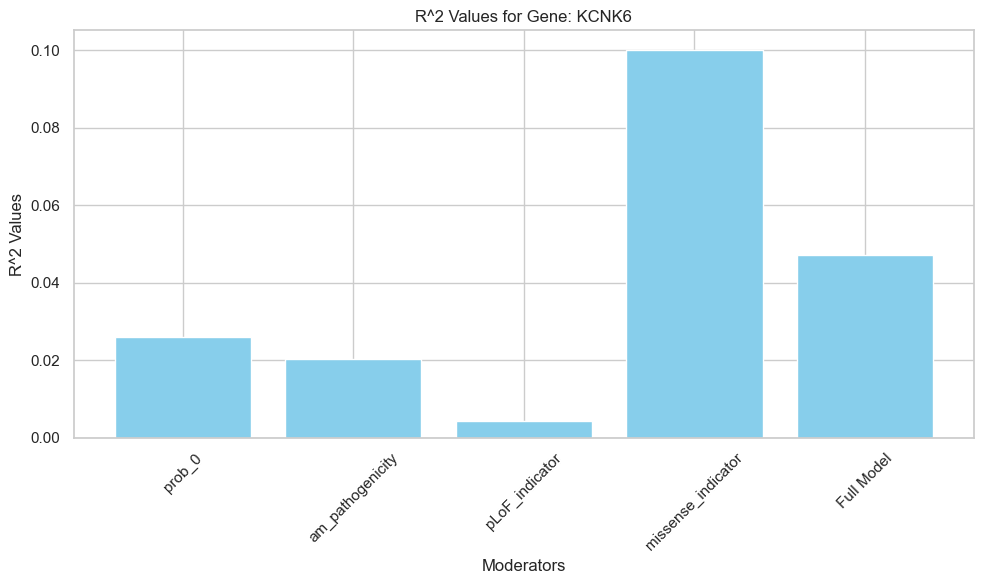

In [113]:
uv.plot_r2(df_filtered, fitted_values_full, style="matplotlib", gene_filter=["KCNK6"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['KCNK6']
Processing full model R² for gene: KCNK6
For gene KCNK6 : SSR Full= 449.5294078798596, SST= 471.72055515586567
Computed Full Model R² values: {'KCNK6': np.float64(0.0470429940638768)}


/Users/salmazainana/umr-visualizer/umr_visualizer/plots.py:178: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




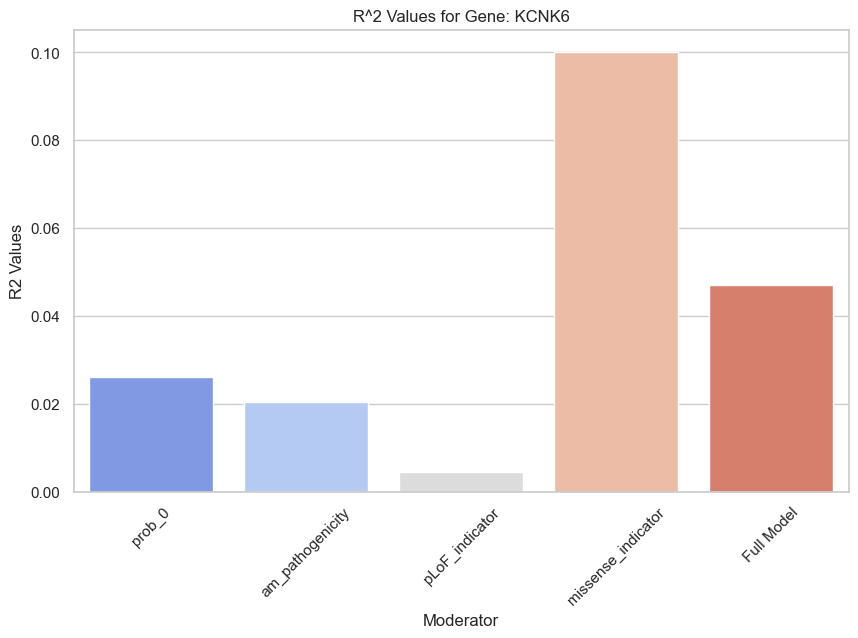

In [114]:
uv.plot_r2(df_filtered, fitted_values_full, style="seaborn", gene_filter=["KCNK6"])

In [115]:
uv.plot_r2(df_filtered, fitted_values_full, style="plotly", gene_filter=["KCNK6"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['KCNK6']
Processing full model R² for gene: KCNK6
For gene KCNK6 : SSR Full= 449.5294078798596, SST= 471.72055515586567
Computed Full Model R² values: {'KCNK6': np.float64(0.0470429940638768)}
